📊 AI Model Results Analysis for Multiple Models

1. Setup and Imports

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from PIL import Image
import os

# Ensure plots are displayed inline
%matplotlib inline


2. Load and Combine Results from Multiple Models

In [33]:
# Load multiple model results
def load_model_results(model_list):
    """
    Load multiple model results into a single DataFrame with model names.
    """
    combined_results = []
    
    for model_info in model_list:
        results_path = model_info['results_path']
        model_name = model_info['model']
        
        try:
            df = pd.read_csv(results_path)
            df['model'] = model_name  # Add a column with the model name
            combined_results.append(df)
            print(f"✅ Loaded results for model: {model_name} ({len(df)} rows).")
        except FileNotFoundError:
            print(f"❌ File not found: {results_path}")
    
    combined_df = pd.concat(combined_results, ignore_index=True)
    combined_df['real'] = combined_df['real'].astype(str)
    combined_df['pred'] = combined_df['pred'].astype(str)
    print(f"\n✅ Combined data contains {len(combined_df)} rows from {len(model_list)} models.")
    return combined_df

# Example usage
model_list = [
    # {"results_path": "/data/luiz/dataset/results/behaviour-classifier/blip_serengeti_-.csv", "model": "BLIP"},
    # {"results_path": "/data/luiz/dataset/results/behaviour-classifier/blip_serengeti_seq.csv", "model": "BLIP-SEQ"},
    # {"results_path": "/data/luiz/dataset/results/behaviour-classifier/blip_serengeti_pretrained-seq.csv", "model": "BLIP-PRETRAINED-SEQ"},
    # {"results_path": "/data/luiz/dataset/results/behaviour-classifier/blip_serengeti_pretrained.csv", "model": "BLIP-PRETRAINED"},
    # {"results_path": "/data/luiz/dataset/results/behaviour-classifier/clip_serengeti_-.csv", "model": "CLIP"},
    # {"results_path": "/data/luiz/dataset/results/behaviour-classifier/clip_serengeti_seq.csv", "model": "CLIP-SEQ"},
    # {"results_path": "/data/luiz/dataset/results/behaviour-classifier/clip_serengeti_pretrained-seq.csv", "model": "CLIP-PRETRAINED-SEQ"},
    # {"results_path": "/data/luiz/dataset/results/behaviour-classifier/clip_serengeti_pretrained.csv", "model": "CLIP-PRETRAINED"},
    # {"results_path": "/data/luiz/dataset/results/behaviour-classifier/gpt_serengeti_seq.csv", "model": "GPT-SEQ"},
    # {"results_path": "/data/luiz/dataset/results/behaviour-classifier/gpt_serengeti_-.csv", "model": "GPT"},
    # {"results_path": "/data/luiz/dataset/results/behaviour-classifier/gemini_serengeti_seq.csv", "model": "GEMINI-SEQ"},
    # {"results_path": "/data/luiz/dataset/results/behaviour-classifier/gemini_serengeti_-.csv", "model": "GEMINI"},

    {"results_path": "/data/luiz/dataset/results/animal-classifier/blip_serengeti_-.csv", "model": "BLIP"},
    {"results_path": "/data/luiz/dataset/results/animal-classifier/blip_serengeti_pretrained.csv", "model": "BLIP-PRETRAINED"},
    {"results_path": "/data/luiz/dataset/results/animal-classifier/clip_serengeti_-.csv", "model": "CLIP"},
    {"results_path": "/data/luiz/dataset/results/animal-classifier/clip_serengeti_pretrained.csv", "model": "CLIP-PRETRAINED"},
    # {"results_path": "/data/luiz/dataset/results/animal-classifier/gpt_serengeti_-.csv", "model": "GPT"},
    # {"results_path": "/data/luiz/dataset/results/animal-classifier/gemini_serengeti_-.csv", "model": "GEMINI"},
]

results_df = load_model_results(model_list)
results_df.head()


✅ Loaded results for model: BLIP (8000 rows).
✅ Loaded results for model: BLIP-PRETRAINED (8000 rows).
✅ Loaded results for model: CLIP (8000 rows).
✅ Loaded results for model: CLIP-PRETRAINED (8000 rows).

✅ Combined data contains 32000 rows from 4 models.


,pred,real,path,model
0,no,0,/ssd/luiz/dataset/serengeti_images/S6/H02/H02_...,BLIP
1,no,0,/ssd/luiz/dataset/serengeti_images/S2/J07/J07_...,BLIP
2,1,0,/ssd/luiz/dataset/serengeti_images/S2/D08/D08_...,BLIP
3,1,0,/ssd/luiz/dataset/serengeti_images/S2/O12/O12_...,BLIP
4,yes,0,/ssd/luiz/dataset/serengeti_images/S4/C02/C02_...,BLIP


3. Overview and Preprocessing

In [34]:
# Display basic statistics
def data_overview(df):
    """
    Display an overview of the data.
    """
    print("📝 Basic Data Information:")
    print(df.info())
    print("\n🔍 Missing Values:")
    print(df.isnull().sum())
    print("\n📊 Class Distribution Across Models:")
    print(df.groupby('model')['real'].value_counts())
    
# Example usage
# data_overview(results_df)


4. Model-Wise Performance Metrics

In [40]:
# Evaluate performance for each model
def evaluate_performance_per_model(df):
    """
    Evaluate model performance per model name.
    """
    model_metrics = []
    
    for model in df['model'].unique():
        model_df = df[df['model'] == model]
        y_true = model_df['real']
        y_pred = model_df['pred']
        
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
        
        model_metrics.append({
            'Model': model,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
    
    metrics_df = pd.DataFrame(model_metrics)
    metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)
    print(metrics_df)
    return metrics_df

# Example usage
metrics_df = evaluate_performance_per_model(results_df)


             Model  Accuracy  Precision    Recall  F1 Score
1  BLIP-PRETRAINED  0.911750   0.911782  0.911750  0.911751
2             CLIP  0.791625   0.800716  0.791625  0.789853
3  CLIP-PRETRAINED  0.496250   0.246264  0.496250  0.329175
0             BLIP  0.084125   0.460187  0.084125  0.130745


5. Model Comparison Visualization

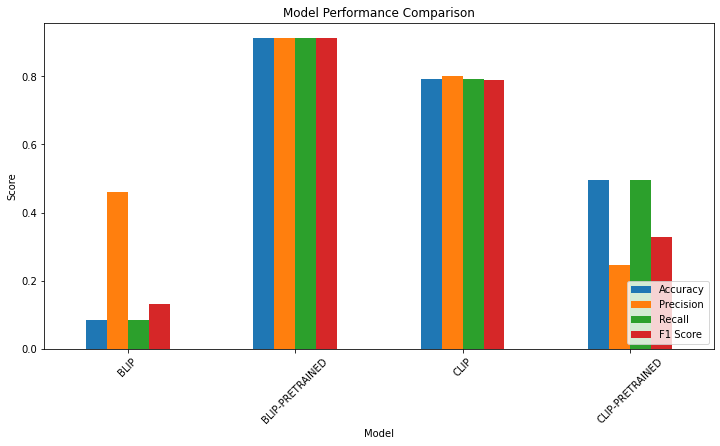

In [36]:
# Visualize model performance comparison
def plot_model_performance(metrics_df):
    """
    Plot model performance metrics comparison.
    """
    metrics_df.plot(x='Model', kind='bar', figsize=(12, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.legend(loc='lower right')
    plt.show()

# Example usage
plot_model_performance(metrics_df)


6. Confusion Matrix Per Model

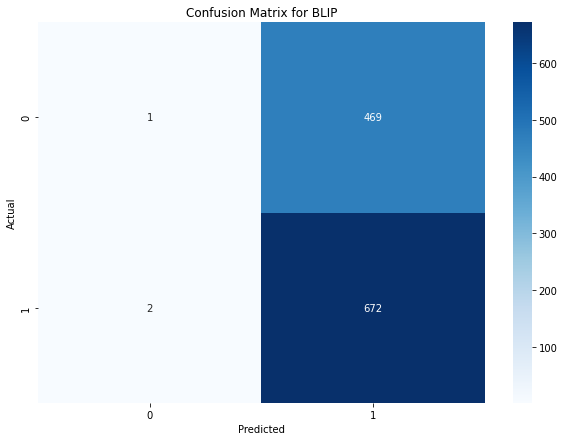

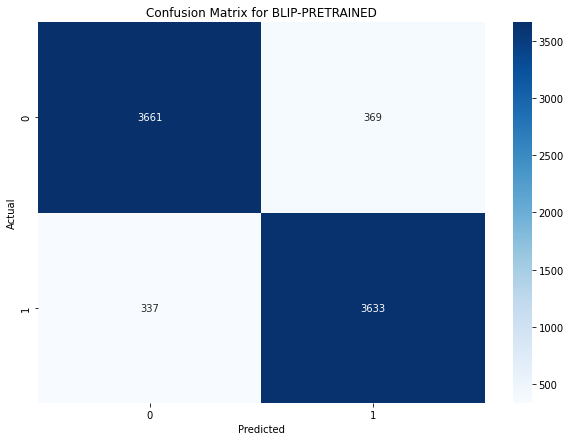

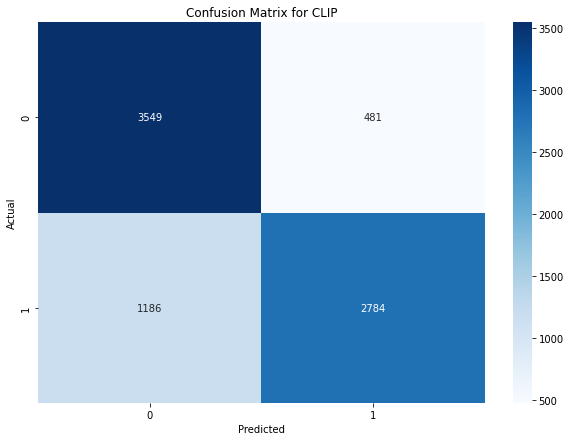

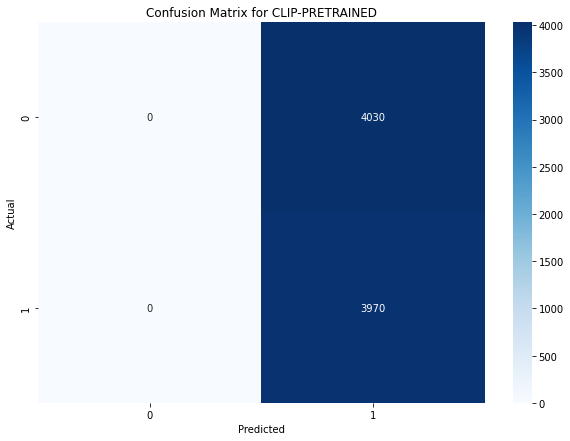

In [37]:
# Display confusion matrix per model
def plot_confusion_matrix_per_model(df):
    """
    Plot confusion matrices for each model.
    """
    for model in df['model'].unique():
        model_df = df[df['model'] == model]
        y_true = model_df['real']
        y_pred = model_df['pred']
        labels = sorted(model_df['real'].unique())
        
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {model}')
        plt.show()

# Example usage
plot_confusion_matrix_per_model(results_df)


7. Misclassified Samples Per Model

🔍 Misclassified Samples for Model: BLIP


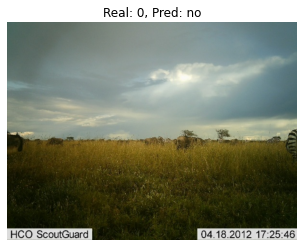

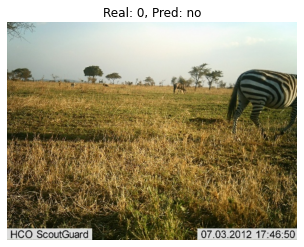

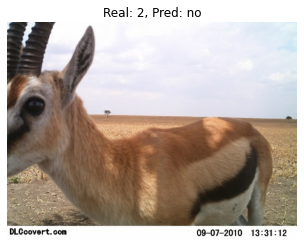

🔍 Misclassified Samples for Model: BLIP-SEQ


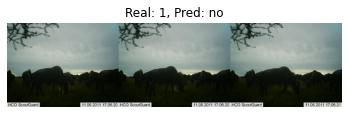

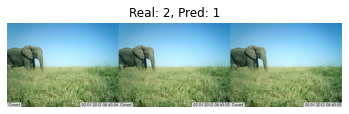

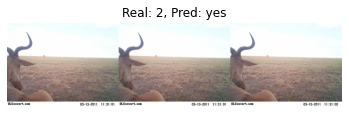

🔍 Misclassified Samples for Model: BLIP-PRETRAINED-SEQ


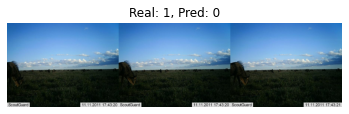

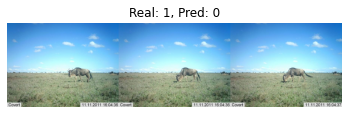

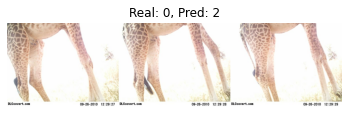

🔍 Misclassified Samples for Model: BLIP-PRETRAINED


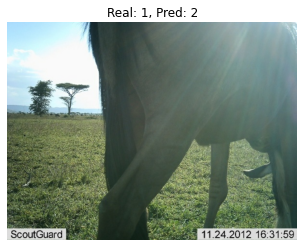

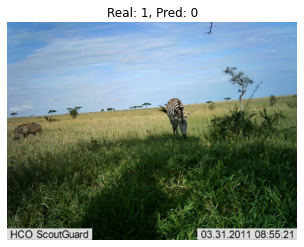

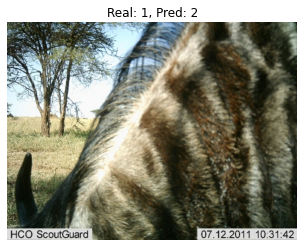

🔍 Misclassified Samples for Model: CLIP


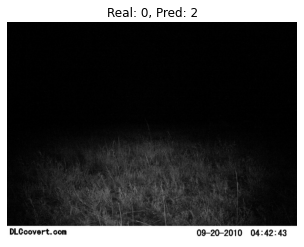

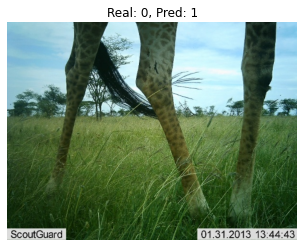

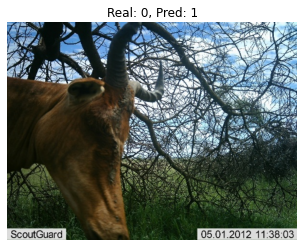

🔍 Misclassified Samples for Model: CLIP-SEQ


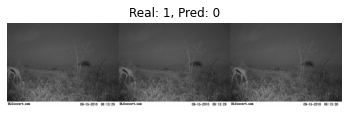

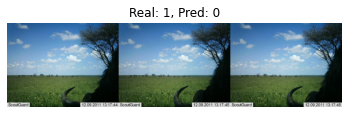

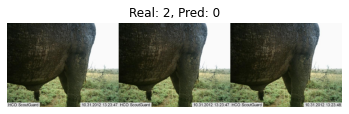

🔍 Misclassified Samples for Model: CLIP-PRETRAINED-SEQ


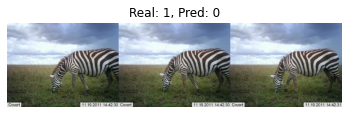

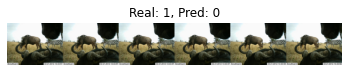

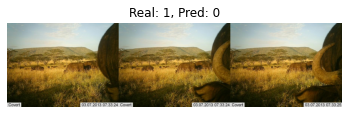

🔍 Misclassified Samples for Model: CLIP-PRETRAINED


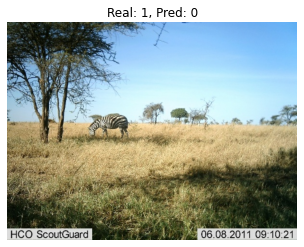

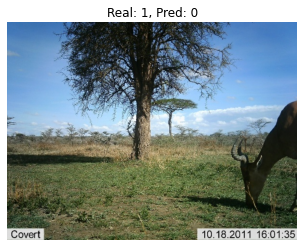

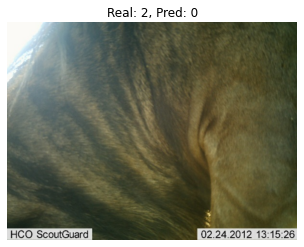

🔍 Misclassified Samples for Model: GPT-SEQ


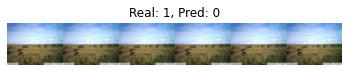

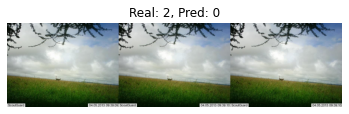

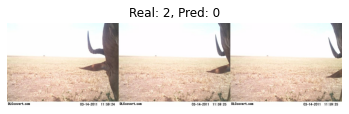

🔍 Misclassified Samples for Model: GPT


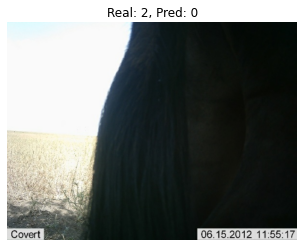

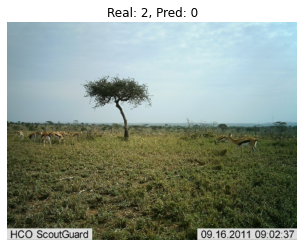

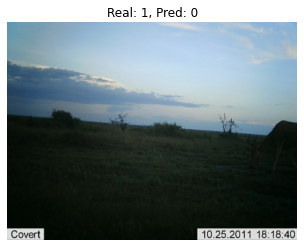

🔍 Misclassified Samples for Model: GEMINI-SEQ


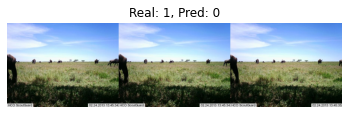

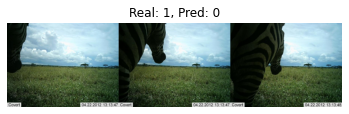

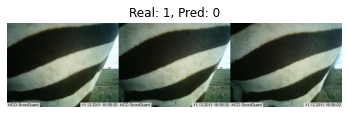

🔍 Misclassified Samples for Model: GEMINI


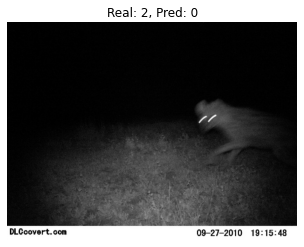

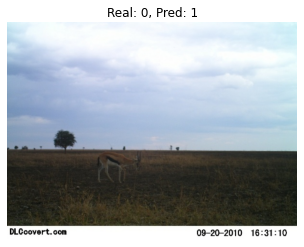

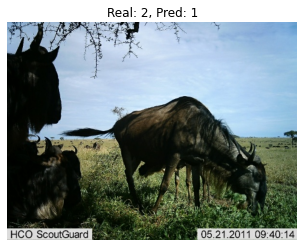

In [30]:
# Show sample incorrect predictions per model
def show_misclassified_samples_per_model(df, sample_size=5):
    """
    Display misclassified images for each model.
    """
    for model in df['model'].unique():
        print(f"🔍 Misclassified Samples for Model: {model}")
        model_df = df[(df['model'] == model) & (df['pred'] != df['real'])]
        
        if len(model_df) == 0:
            print("🎉 No misclassifications found!")
            continue
        
        sample = model_df.sample(n=min(sample_size, len(model_df)))
        for index, row in sample.iterrows():
            img_path = row['path']
            pred_label = row['pred']
            real_label = row['real']
            
            if os.path.exists(img_path):
                img = Image.open(img_path)
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"Real: {real_label}, Pred: {pred_label}")
                plt.show()
            else:
                print(f"⚠️ Image not found at path: {img_path}")

# Example usage
show_misclassified_samples_per_model(results_df, sample_size=3)


8. Save Model-Wise Analysis Report

In [31]:
# Save model-wise summary report
def save_model_summary_report(metrics_df, output_file='reports/model_summary_report.txt'):
    """
    Save model performance metrics to a text file.
    """
    with open(output_file, 'w') as f:
        f.write("Model Performance Summary:\n")
        f.write(metrics_df.to_string(index=False))
    
    print(f"✅ Summary report saved to {output_file}")

# Example usage
save_model_summary_report(metrics_df)


✅ Summary report saved to reports/model_summary_report.txt
